In [1]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

In [2]:
class Arbol:
    def __init__(self):
        self.raiz = None
    
    def vacio(self):
        return self.raiz is None
    
    def insertar(self, valor):
        if self.vacio():
            self.raiz = Nodo(valor)
        else:
            self._insertar_recursivo(self.raiz, valor)
    
    def _insertar_recursivo(self, nodo_actual, valor):
        if valor < nodo_actual.valor:
            if nodo_actual.izquierdo is None:
                nodo_actual.izquierdo = Nodo(valor)
            else:
                self._insertar_recursivo(nodo_actual.izquierdo, valor)
        elif valor > nodo_actual.valor:
            if nodo_actual.derecho is None:
                nodo_actual.derecho = Nodo(valor)
            else:
                self._insertar_recursivo(nodo_actual.derecho, valor)
    
    def buscar_nodo(self, valor):
        return self._buscar_recursivo(self.raiz, valor)
    
    def _buscar_recursivo(self, nodo_actual, valor):
        if nodo_actual is None or nodo_actual.valor == valor:
            return nodo_actual
        if valor < nodo_actual.valor:
            return self._buscar_recursivo(nodo_actual.izquierdo, valor)
        else:
            return self._buscar_recursivo(nodo_actual.derecho, valor)

In [3]:
# Crear un árbol binario de búsqueda
arbol = Arbol()

# Insertar nodos
arbol.insertar(50)
arbol.insertar(30)
arbol.insertar(70)
arbol.insertar(20)
arbol.insertar(40)
arbol.insertar(60)
arbol.insertar(80)

# Buscar un nodo
nodo = arbol.buscar_nodo(40)
if nodo is not None:
    print(f"Nodo encontrado: {nodo.valor}")
else:
    print("Nodo no encontrado")

# Verificar si el árbol está vacío
print(f"¿El árbol está vacío? {arbol.vacio()}")

Nodo encontrado: 40
¿El árbol está vacío? False


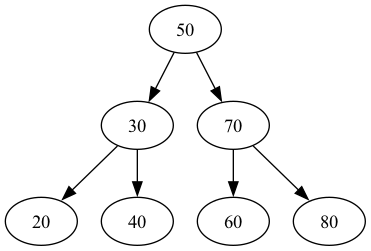

In [8]:
import pydot

def visualizar_arbol(arbol):
    graph = pydot.Dot(graph_type='digraph')
    
    def agregar_nodos(nodo):
        if nodo:
            graph.add_node(pydot.Node(str(nodo.valor)))
            if nodo.izquierdo:
                graph.add_edge(pydot.Edge(str(nodo.valor), str(nodo.izquierdo.valor)))
                agregar_nodos(nodo.izquierdo)
            if nodo.derecho:
                graph.add_edge(pydot.Edge(str(nodo.valor), str(nodo.derecho.valor)))
                agregar_nodos(nodo.derecho)
    
    agregar_nodos(arbol.raiz)
    return graph

# Visualize (creates an image file)
arbol_image = visualizar_arbol(arbol)
arbol_image.write_png('arbol.png')

# Display in Jupyter
from IPython.display import Image
Image('arbol.png')